In [3]:
from postprocessing_utils import PostProcess
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from skimage import morphology

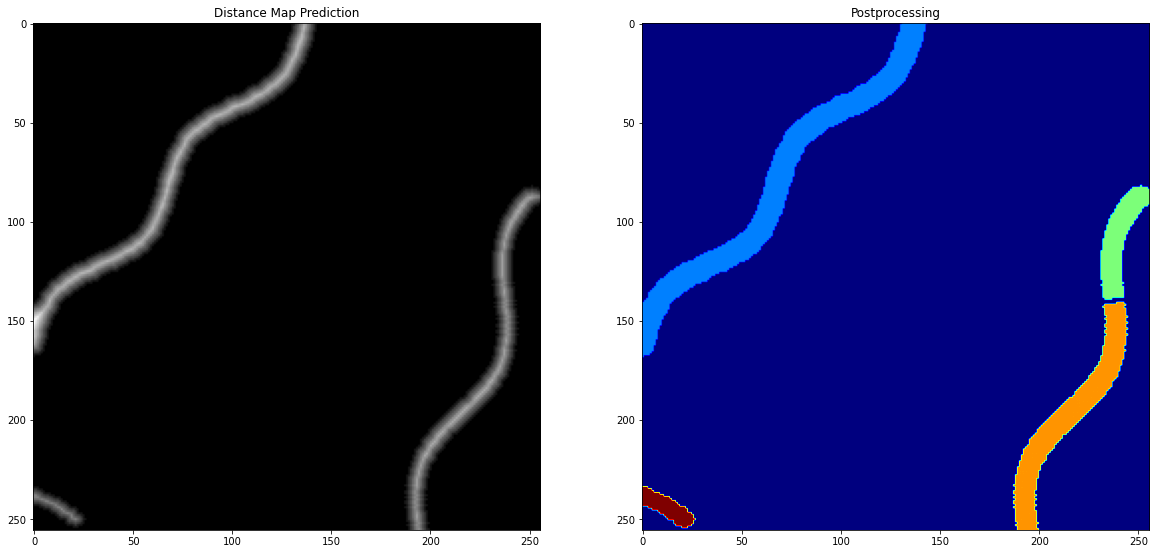

In [10]:
distance_map = cv2.imread('_sample_gt.png', 0)

# normalizar solo para sacar segmentos
dm_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX)
segmentos = PostProcess(dm_normalized, 40, 16)

plt.figure(figsize=(20,20))
# plt.subplot(1,3,1), plt.title('Sample Fiber'), plt.imshow(sample)
plt.subplot(1,2,1), plt.title('Distance Map Prediction'), plt.imshow(distance_map, cmap='gray')
plt.subplot(1,2,2), plt.title('Postprocessing'), plt.imshow(segmentos, cmap='jet')
plt.show()

distance_map.dtype: float64
distance_map.max(): 9.411764705882353


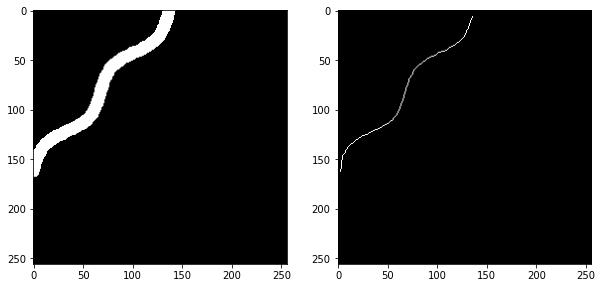

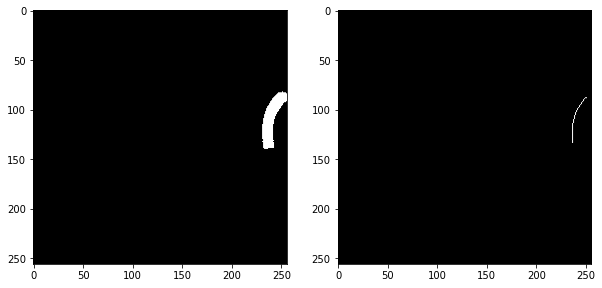

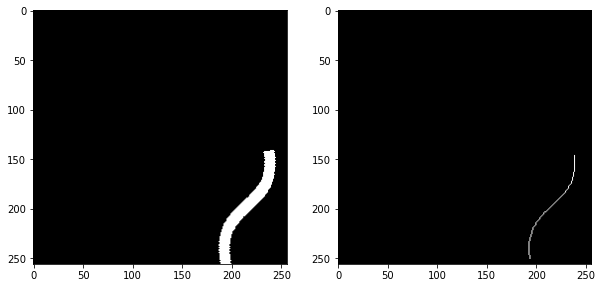

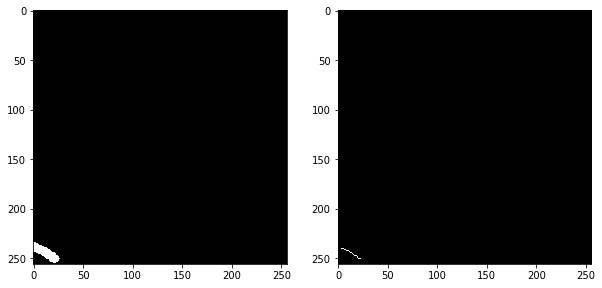

In [11]:
# retornamos dm a sus valores originales
distance_map = (distance_map / 255) / 0.01
print("distance_map.dtype:", distance_map.dtype)
print('distance_map.max():', distance_map.max())

regions = regionprops(segmentos)
diameters = {}

for i,props in enumerate(regions):

    seg = segmentos==i+1

    skel = morphology.skeletonize(seg, method='lee')

    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(seg, cmap='gray')
    plt.subplot(122), plt.imshow(skel, cmap='gray')
    plt.show()

    # mostrar dm correspondiente
    # seleccionar valores del dm donde skel>0, multiplicar por 2 y crear diccionario de diametros
    all_diametros = np.floor(distance_map[skel>0]*2)
    # print(all_diametros.max())

    unique, counts = np.unique(all_diametros, return_counts=True)
    
    diam_ocur = dict(zip(unique, counts))

    for k,v in diam_ocur.items():
        diameters[k] = diameters.get(k,0) + v

# print(np.sum(all_diametros) / all_diametros.shape[0])
#print('Promedio: ', )

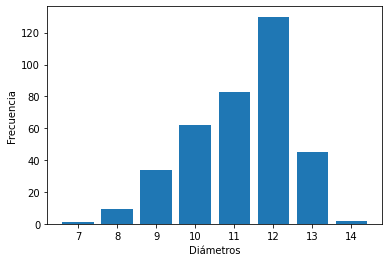

In [12]:
plt.bar(list(diameters.keys()), diameters.values())
plt.ylabel('Frecuencia')
plt.xlabel('Diámetros')
plt.show()

In [13]:
suma = 0
contador = 0
for k,v in diameters.items():
  # v = (v / 255) / 0.01
  suma += k*v
  contador += v

print('contador = ', contador)
print('promedio = ', suma / contador)

#print('x=', (4/255)*(suma/contador))

contador =  366
promedio =  11.1775956284153
